In [1]:
#------------------------------------------------------------------------
# FUNCAO QUE MONTA O CIRCUITO DA QFT DE '2' QUBITS:
#------------------------------------------------------------------------
def QFT_2qubit(Changing_initial_state):
    from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit;
#------------------------------
# CARACTERISTICAS GERAIS DO CIRCUITO
    nQ = 2; # <-- NUMERO DE QUBITS
    nC = 2; # <-- NUMERO DE BITS CLASSICOS
    Q  = QuantumRegister(  nQ, name = 'j');
    C  = ClassicalRegister(nC, name = 'c');
    QC = QuantumCircuit(Q, C, name = "QFT_2qubit");
#------------------------------     
    if Changing_initial_state == 0:
        None;
    if Changing_initial_state == 1:
        QC.x(Q[1]); # <-- PORTA 'X' NO QUBIT 1
        QC.barrier();
    if Changing_initial_state == 2:
        QC.x(Q[0]); # <-- PORTA 'X' NO QUBIT 0
        QC.barrier();
    if Changing_initial_state == 3:
        QC.x(Q[0]); # <-- PORTA 'X' NO QUBIT 0
        QC.x(Q[1]); # <-- PORTA 'X' NO QUBIT 1
        QC.barrier();
#------------------------------ 
    QC.h(Q[1]);  # <-- PORTA 'H' NO QUBIT 1
    Rk(QC, Q[0], Q[1], 2, 1.0);
    QC.barrier();
#------------------------------
    QC.h(Q[0]);  # <-- PORTA 'H' NO QUBIT 0
    QC.barrier();
#------------------------------
# PORTA SWAP:
#------------------------------
    QC.swap( Q[0], Q[1] );
#------------------------------
    QC.barrier();
    QC.measure(Q, C); 
#------------------------------  
    print('QFT_2qubit(): FUNCIONA');
#------------------------------
    return QC;
#------------------------------------------------------------------------
# FUNCAO QUE DEFINE A PORTA Rk USANDO A PORTA cu1:
#------------------------------------------------------------------------
def Rk(QC, Q_CONTROL, Q_TARGET, k, a):
    import math as MT; PI = MT.pi;
    QC.cu1( a*2.0*PI/2.0**k, Q_CONTROL, Q_TARGET);
    return None;

In [2]:
#------------------------------------------------------------------------
# FUNCAO QUE EXECUTA O CIRCUITO NA MAQUINA LOCAL:
#------------------------------------------------------------------------
def SIMULADOR_LOCAL(QC, N_SHOTS, BACKEND_NAME):
    from qiskit  import Aer;
    from qiskit  import execute;
#--------------
    F_NAME = '\'SIMULADOR_LOCAL()\'';
    BACKEND = Aer.get_backend(BACKEND_NAME);
#-----------------------------------------------------------------------
    EXP = execute(QC, BACKEND, shots=N_SHOTS);
    RESULT = EXP.result();
    print(' RESULTS:');
#   print('   EXP.result():', RESULT); # <-- IMPRIMI UM MONTE DE COISAS
    print('   backend_name:', RESULT.backend_name, end =' |');
    print('   status:',       RESULT.status, end =' |');
    print('   success:',      RESULT.success);
#   print('   data:',         RESULT.data); <-- IMPRIMI UM MONTE DE COISAS
    print('   get_counts():', RESULT.get_counts() );
#-----------------------------------------------------------------------
    print(' ---------- FIM DA FUNCAO %s---------- '% F_NAME);
    return RESULT.get_counts();

In [3]:
#------------------------------------------------------------------------
# FUNCAO PARA CRIAR O HISTOGRAMA:
#------------------------------------------------------------------------
def PLOT_HISTOGRAMS(DATA):
    from qiskit.tools.visualization import plot_histogram, iplot_histogram;
    BAR_LABELS = True; # <-- MOSTRAR AS PROBABILIDADES ACIMA DAS BARRAS DO HISTOGRAMA
    HIST = plot_histogram( DATA, bar_labels = BAR_LABELS, color='blue', figsize = (10, 6) );
    display(HIST);
    return None;

In [4]:
QC_QFT_2qubit0 = QFT_2qubit(0);
QC_QFT_2qubit1 = QFT_2qubit(1);
QC_QFT_2qubit2 = QFT_2qubit(2);
QC_QFT_2qubit3 = QFT_2qubit(3);

QFT_2qubit(): FUNCIONA
QFT_2qubit(): FUNCIONA
QFT_2qubit(): FUNCIONA
QFT_2qubit(): FUNCIONA


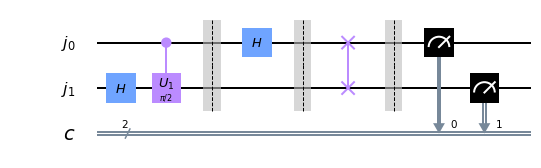

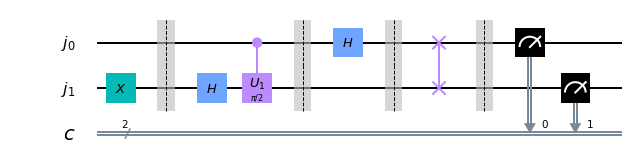

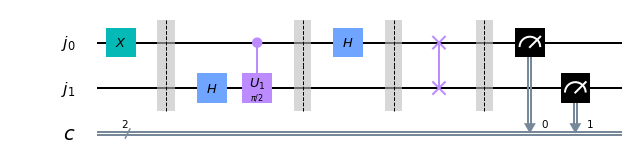

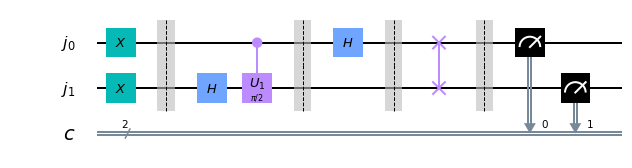

In [5]:
display(QC_QFT_2qubit0.draw(output='mpl'));
display(QC_QFT_2qubit1.draw(output='mpl'));
display(QC_QFT_2qubit2.draw(output='mpl'));
display(QC_QFT_2qubit3.draw(output='mpl'));

In [6]:
#----------------------------------------------
# FUNCAO PARA SIMULAR UM CIRCUITO QUANTICO NA
# MAQUINA LOCAL
#----------------------------------------------
def SIMULADOR_LOCAL(QC, N_SHOTS, BACKEND_NAME):
    from qiskit  import Aer;
    from qiskit  import execute;
#--------------
    F_NAME = '\'SIMULADOR_LOCAL()\'';
    BACKEND = Aer.get_backend(BACKEND_NAME);
#-----------------------------------------------------------------------
    EXP = execute(QC, BACKEND, shots=N_SHOTS);
    RESULT = EXP.result();
    print(' RESULTS:');
#   print('   EXP.result():', RESULT); # <-- IMPRIMI UM MONTE DE COISAS
    print('   backend_name:', RESULT.backend_name, end =' |');
    print('   status:',       RESULT.status, end =' |');
    print('   success:',      RESULT.success);
#   print('   data:',         RESULT.data); <-- IMPRIMI UM MONTE DE COISAS
    print('   get_counts():', RESULT.get_counts() );
#-----------------------------------------------------------------------
    print(' ---------- FIM DA FUNCAO %s---------- '% F_NAME);
    return RESULT.get_counts();

In [7]:
#------------------------------------------------------------------------
# FUNCAO PARA CRIAR O HISTOGRAMA:
#------------------------------------------------------------------------
def PLOT_HISTOGRAMS( DATA ):
    from qiskit.tools.visualization import plot_histogram;
    BAR_LABELS = True; # <-- MOSTRAR AS PROBABILIDADES ACIMA DAS BARRAS DO HISTOGRAMA
    HIST = plot_histogram( DATA, bar_labels = BAR_LABELS, figsize = (15, 4) );
    display(HIST);
    return None;

In [8]:
#------------------------------------------------------------------------
# SIMULANDO OS CIRCUITOS:
#------------------------------------------------------------------------
N_SHOTS = 2**(13);
BACKEND_NAME = "qasm_simulator";

DADOS_0 = SIMULADOR_LOCAL(QC_QFT_2qubit0, N_SHOTS, BACKEND_NAME);
DADOS_1 = SIMULADOR_LOCAL(QC_QFT_2qubit1, N_SHOTS, BACKEND_NAME);
DADOS_2 = SIMULADOR_LOCAL(QC_QFT_2qubit2, N_SHOTS, BACKEND_NAME);
DADOS_3 = SIMULADOR_LOCAL(QC_QFT_2qubit3, N_SHOTS, BACKEND_NAME);

 RESULTS:
   backend_name: qasm_simulator |   status: COMPLETED |   success: True
   get_counts(): {'11': 2007, '01': 2092, '10': 2014, '00': 2079}
 ---------- FIM DA FUNCAO 'SIMULADOR_LOCAL()'---------- 
 RESULTS:
   backend_name: qasm_simulator |   status: COMPLETED |   success: True
   get_counts(): {'11': 2037, '01': 2015, '10': 2057, '00': 2083}
 ---------- FIM DA FUNCAO 'SIMULADOR_LOCAL()'---------- 
 RESULTS:
   backend_name: qasm_simulator |   status: COMPLETED |   success: True
   get_counts(): {'11': 2065, '01': 1978, '10': 2092, '00': 2057}
 ---------- FIM DA FUNCAO 'SIMULADOR_LOCAL()'---------- 
 RESULTS:
   backend_name: qasm_simulator |   status: COMPLETED |   success: True
   get_counts(): {'11': 2095, '01': 1979, '10': 2080, '00': 2038}
 ---------- FIM DA FUNCAO 'SIMULADOR_LOCAL()'---------- 


In [9]:
import matplotlib.pyplot as plt
from qiskit.tools.visualization import plot_histogram;

In [10]:
fig = plot_histogram( [DADOS_0], bar_labels = False, color='blue', figsize = (10, 6) );
ax = fig.axes[0]
ax.patch.set_facecolor('white')
ax.patch.set_alpha(0.5)
ax.patch.set_edgecolor('black')
ax.set_ylabel('Probabilidades', fontsize=26)
ax.set_yticklabels([0.00, 0.08, 0.16, 0.24], fontsize=20)
ax.set_xticklabels([r'$\left\vert00\right\rangle$', r'$\left\vert01\right\rangle$', r'$\left\vert10\right\rangle$', r'$\left\vert11\right\rangle$' ], fontsize=20)
fig.savefig('Hist_QC_QFT_2qubit0.png') 

In [11]:
fig = plot_histogram( [DADOS_1], bar_labels = False, color='blue', figsize = (10, 6) );
ax = fig.axes[0]
ax.patch.set_facecolor('white')
ax.patch.set_alpha(0.5)
ax.patch.set_edgecolor('black')
ax.set_ylabel('Probabilidades', fontsize=26)
ax.set_yticklabels([0.00, 0.08, 0.16, 0.24], fontsize=20)
ax.set_xticklabels([r'$\left\vert00\right\rangle$', r'$\left\vert01\right\rangle$', r'$\left\vert10\right\rangle$', r'$\left\vert11\right\rangle$' ], fontsize=20)
fig.savefig('Hist_QC_QFT_2qubit1.png') 

In [12]:
fig = plot_histogram( [DADOS_2], bar_labels = False, color='blue', figsize = (10, 6) );
ax = fig.axes[0]
ax.patch.set_facecolor('white')
ax.patch.set_alpha(0.5)
ax.patch.set_edgecolor('black')
ax.set_ylabel('Probabilidades', fontsize=26)
ax.set_yticklabels([0.00, 0.08, 0.16, 0.24], fontsize=20)
ax.set_xticklabels([r'$\left\vert00\right\rangle$', r'$\left\vert01\right\rangle$', r'$\left\vert10\right\rangle$', r'$\left\vert11\right\rangle$' ], fontsize=20)
fig.savefig('Hist_QC_QFT_2qubit2.png') 

In [13]:
fig = plot_histogram( [DADOS_3], bar_labels = False, color='blue', figsize = (10, 6) );
ax = fig.axes[0]
ax.patch.set_facecolor('white')
ax.patch.set_alpha(0.5)
ax.patch.set_edgecolor('black')
ax.set_ylabel('Probabilidades', fontsize=26)
ax.set_yticklabels([0.00, 0.08, 0.16, 0.24], fontsize=20)
ax.set_xticklabels([r'$\left\vert00\right\rangle$', r'$\left\vert01\right\rangle$', r'$\left\vert10\right\rangle$', r'$\left\vert11\right\rangle$' ], fontsize=20)
fig.savefig('Hist_QC_QFT_2qubit3.png') 

In [14]:
#------------------------------------------------------------------------
# FUNCAO PARA SE REGISTRAR NA IBM:
#------------------------------------------------------------------------
def CHIP_REGISTER():
    from qiskit import IBMQ
#−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−
    # Você pode obter o seu token em:
    # https://quantum-computing.ibm.com/
    QX_TOKEN = "cole seu token aqui"
    QX_URL = "https://quantumexperience.ng.bluemix.net/api"
#−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−
    try :
        IBMQ.save_account(QX_TOKEN)
        print('Registado com sucesso!')
    except :
        print('Algo deu errado. \nVocê inseriu o token correto?')
    return None
#-----------------------------------------------------------------------
CHIP_REGISTER()

 CHIP_REGISTER() DIZ:
 REGISTER OK


In [15]:
#------------------------------------------------------------------------
# FUNCAO QUE EXECUTA O CIRCUITO NA MAQUINA REMOTA:
#------------------------------------------------------------------------
def SIMULADOR_REMOTO(QC, N_SHOTS, BACKEND_NAME):
    from qiskit               import IBMQ
    from qiskit               import execute
    from qiskit.tools.monitor import job_monitor
#--------------
    F_NAME = '\'SIMULADOR_REMOTO()\''
    BACKEND = IBMQ.get_backend(BACKEND_NAME)
# METODO NOVO:
#   PROVIDER = IBMQ.load_account()
#   PROVIDER = IBMQ.enable_account('MY_API_TOKEN')
#   BACKEND  = PROVIDER.get_backend(BACKEND_NAME)
#--------------
    STATUS  = BACKEND.status()
    if( STATUS.operational == False ):
        print(' FUNCAO %s DIZ:'% F_NAME )
        print(' ESTE BACKEND NAO ESTA OPERACIONAL NO MOMENTO, VEJA:')
        print("    STATUS.operational =",  STATUS)
        print(' ENCERRANDO'); return None
#-----------------------------------------------------------------------
    EXP = execute(QC, BACKEND, shots=N_SHOTS)
    job_monitor(EXP, interval = 5)

    RESULT = EXP.result()
    print(' RESULTS:')
    print('   backend_name:', RESULT.backend_name, end =' |')
    print('   status:',       RESULT.status, end =' |')
    print('   success:',      RESULT.success)
    print('   get_counts():', RESULT.get_counts() ) # print(' get_data() = ',   result.get_data(qc) )
#-----------------------------------------------------------------------
    print(' ---------- FIM DA FUNCAO %s---------- '% F_NAME)
    return RESULT.get_counts()

In [51]:
# EXECUTANDO O CIRCUITO COM ESTADO INICIAL: 00
N_SHOTS = 2**(13);

BACKEND_NAME = "ibmqx2";              DADOS_ibmqx2 = SIMULADOR_REMOTO(QC_QFT_2qubit0, N_SHOTS, BACKEND_NAME);
BACKEND_NAME = "ibmq_ourense";        DADOS_ibmq_ourense = SIMULADOR_REMOTO(QC_QFT_2qubit0, N_SHOTS, BACKEND_NAME);
BACKEND_NAME = "ibmq_16_melbourne";   DADOS_ibmq_16_melbourne = SIMULADOR_REMOTO(QC_QFT_2qubit0, N_SHOTS, BACKEND_NAME);


/home/warley/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:594: DeprecationWarning: IBMQ.get_backend() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.get_backend("name") to retrieve a backend.
  DeprecationWarning)


Job Status: job has successfully run
 RESULTS:
   backend_name: ibmqx2 |   status: Successful completion |   success: True
   get_counts(): {'11': 1452, '01': 2285, '10': 1649, '00': 2806}
 ---------- FIM DA FUNCAO 'SIMULADOR_REMOTO()'---------- 


/home/warley/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:594: DeprecationWarning: IBMQ.get_backend() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.get_backend("name") to retrieve a backend.
  DeprecationWarning)


Job Status: job has successfully run
 RESULTS:
   backend_name: ibmq_ourense |   status: Successful completion |   success: True
   get_counts(): {'11': 2448, '01': 2174, '10': 1243, '00': 2327}
 ---------- FIM DA FUNCAO 'SIMULADOR_REMOTO()'---------- 


/home/warley/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:594: DeprecationWarning: IBMQ.get_backend() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.get_backend("name") to retrieve a backend.
  DeprecationWarning)


Job Status: job has successfully run
 RESULTS:
   backend_name: ibmq_16_melbourne |   status: Successful completion |   success: True
   get_counts(): {'11': 1821, '01': 1879, '10': 1693, '00': 2799}
 ---------- FIM DA FUNCAO 'SIMULADOR_REMOTO()'---------- 


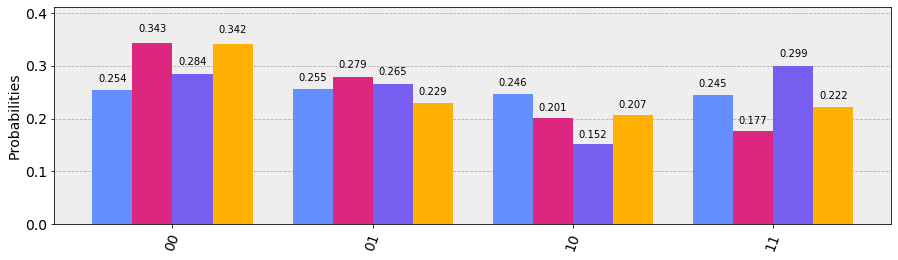

In [52]:
PLOT_HISTOGRAMS( [DADOS_0, DADOS_ibmqx2, DADOS_ibmq_ourense, DADOS_ibmq_16_melbourne] ) 

In [53]:
fig = plot_histogram( [DADOS_0, DADOS_ibmqx2, DADOS_ibmq_ourense, DADOS_ibmq_16_melbourne], bar_labels = False, color= ['blue','red','green','gray'], figsize = (10, 6) );
ax = fig.axes[0]
ax.patch.set_facecolor('white')
ax.patch.set_alpha(0.5)
ax.patch.set_edgecolor('black')
ax.set_ylabel('Probabilidades', fontsize=26)
ax.set_yticklabels([0.0, 0.1, 0.2, 0.3, 0.4], fontsize=20)
ax.set_xticklabels([r'$\left\vert00\right\rangle$', r'$\left\vert01\right\rangle$', r'$\left\vert10\right\rangle$', r'$\left\vert11\right\rangle$' ], fontsize=20)
fig.savefig('Hist_IBMQ_QC_QFT_2qubit0.png')

In [54]:
# EXECUTANDO O CIRCUITO COM ESTADO INICIAL: 01
N_SHOTS = 2**(13);

BACKEND_NAME = "ibmqx2";              DADOS_ibmqx2 = SIMULADOR_REMOTO(QC_QFT_2qubit1, N_SHOTS, BACKEND_NAME);
BACKEND_NAME = "ibmq_ourense";        DADOS_ibmq_ourense = SIMULADOR_REMOTO(QC_QFT_2qubit1, N_SHOTS, BACKEND_NAME);
BACKEND_NAME = "ibmq_16_melbourne";   DADOS_ibmq_16_melbourne = SIMULADOR_REMOTO(QC_QFT_2qubit1, N_SHOTS, BACKEND_NAME);


/home/warley/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:594: DeprecationWarning: IBMQ.get_backend() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.get_backend("name") to retrieve a backend.
  DeprecationWarning)


Job Status: job has successfully run
 RESULTS:
   backend_name: ibmqx2 |   status: Successful completion |   success: True
   get_counts(): {'11': 2925, '01': 2071, '10': 1194, '00': 2002}
 ---------- FIM DA FUNCAO 'SIMULADOR_REMOTO()'---------- 


/home/warley/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:594: DeprecationWarning: IBMQ.get_backend() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.get_backend("name") to retrieve a backend.
  DeprecationWarning)


Job Status: job has successfully run
 RESULTS:
   backend_name: ibmq_ourense |   status: Successful completion |   success: True
   get_counts(): {'11': 2044, '01': 2338, '10': 2182, '00': 1628}
 ---------- FIM DA FUNCAO 'SIMULADOR_REMOTO()'---------- 


/home/warley/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:594: DeprecationWarning: IBMQ.get_backend() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.get_backend("name") to retrieve a backend.
  DeprecationWarning)


Job Status: job has successfully run
 RESULTS:
   backend_name: ibmq_16_melbourne |   status: Successful completion |   success: True
   get_counts(): {'11': 1728, '01': 2155, '10': 2053, '00': 2256}
 ---------- FIM DA FUNCAO 'SIMULADOR_REMOTO()'---------- 


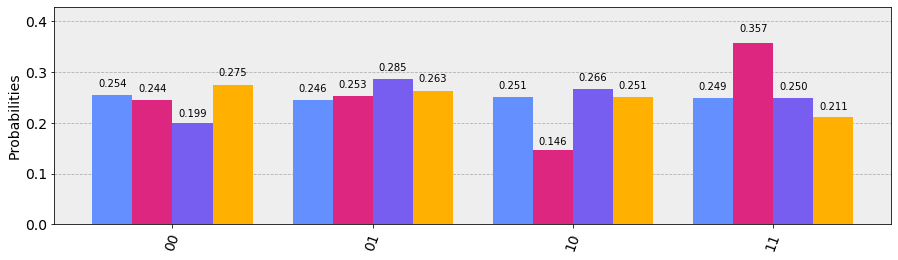

In [55]:
PLOT_HISTOGRAMS( [DADOS_1, DADOS_ibmqx2, DADOS_ibmq_ourense, DADOS_ibmq_16_melbourne] ) 

In [56]:
fig = plot_histogram( [DADOS_1, DADOS_ibmqx2, DADOS_ibmq_ourense, DADOS_ibmq_16_melbourne], bar_labels = False, color= ['blue','red','green','gray'], figsize = (10, 6) );
ax = fig.axes[0]
ax.patch.set_facecolor('white')
ax.patch.set_alpha(0.5)
ax.patch.set_edgecolor('black')
ax.set_ylabel('Probabilidades', fontsize=26)
ax.set_yticklabels([0.0, 0.1, 0.2, 0.3, 0.4], fontsize=20)
ax.set_xticklabels([r'$\left\vert00\right\rangle$', r'$\left\vert01\right\rangle$', r'$\left\vert10\right\rangle$', r'$\left\vert11\right\rangle$' ], fontsize=20)
fig.savefig('Hist_IBMQ_QC_QFT_2qubit1.png')

In [57]:
# EXECUTANDO O CIRCUITO COM ESTADO INICIAL: 10
N_SHOTS = 2**(13);

BACKEND_NAME = "ibmqx2";              DADOS_ibmqx2 = SIMULADOR_REMOTO(QC_QFT_2qubit2, N_SHOTS, BACKEND_NAME);
BACKEND_NAME = "ibmq_ourense";        DADOS_ibmq_ourense = SIMULADOR_REMOTO(QC_QFT_2qubit2, N_SHOTS, BACKEND_NAME);
BACKEND_NAME = "ibmq_16_melbourne";   DADOS_ibmq_16_melbourne = SIMULADOR_REMOTO(QC_QFT_2qubit2, N_SHOTS, BACKEND_NAME);


/home/warley/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:594: DeprecationWarning: IBMQ.get_backend() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.get_backend("name") to retrieve a backend.
  DeprecationWarning)


Job Status: job has successfully run
 RESULTS:
   backend_name: ibmqx2 |   status: Successful completion |   success: True
   get_counts(): {'11': 1473, '01': 3142, '10': 1344, '00': 2233}
 ---------- FIM DA FUNCAO 'SIMULADOR_REMOTO()'---------- 


/home/warley/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:594: DeprecationWarning: IBMQ.get_backend() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.get_backend("name") to retrieve a backend.
  DeprecationWarning)


Job Status: job has successfully run
 RESULTS:
   backend_name: ibmq_ourense |   status: Successful completion |   success: True
   get_counts(): {'11': 2043, '01': 2446, '10': 2013, '00': 1690}
 ---------- FIM DA FUNCAO 'SIMULADOR_REMOTO()'---------- 


/home/warley/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:594: DeprecationWarning: IBMQ.get_backend() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.get_backend("name") to retrieve a backend.
  DeprecationWarning)


Job Status: job has successfully run
 RESULTS:
   backend_name: ibmq_16_melbourne |   status: Successful completion |   success: True
   get_counts(): {'11': 1777, '01': 1948, '10': 2369, '00': 2098}
 ---------- FIM DA FUNCAO 'SIMULADOR_REMOTO()'---------- 


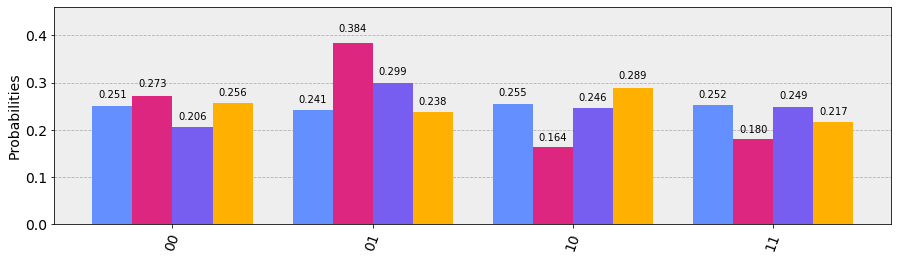

In [58]:
PLOT_HISTOGRAMS( [DADOS_2, DADOS_ibmqx2, DADOS_ibmq_ourense, DADOS_ibmq_16_melbourne] ) 

In [59]:
fig = plot_histogram( [DADOS_2, DADOS_ibmqx2, DADOS_ibmq_ourense, DADOS_ibmq_16_melbourne], bar_labels = False, color= ['blue','red','green','gray'], figsize = (10, 6) );
ax = fig.axes[0]
ax.patch.set_facecolor('white')
ax.patch.set_alpha(0.5)
ax.patch.set_edgecolor('black')
ax.set_ylabel('Probabilidades', fontsize=26)
ax.set_yticklabels([0.0, 0.1, 0.2, 0.3, 0.4], fontsize=20)
ax.set_xticklabels([r'$\left\vert00\right\rangle$', r'$\left\vert01\right\rangle$', r'$\left\vert10\right\rangle$', r'$\left\vert11\right\rangle$' ], fontsize=20)
fig.savefig('Hist_IBMQ_QC_QFT_2qubit2.png')

In [60]:
# EXECUTANDO O CIRCUITO COM ESTADO INICIAL: 11
N_SHOTS = 2**(13);

BACKEND_NAME = "ibmqx2";              DADOS_ibmqx2 = SIMULADOR_REMOTO(QC_QFT_2qubit3, N_SHOTS, BACKEND_NAME);
BACKEND_NAME = "ibmq_ourense";        DADOS_ibmq_ourense = SIMULADOR_REMOTO(QC_QFT_2qubit3, N_SHOTS, BACKEND_NAME);
BACKEND_NAME = "ibmq_16_melbourne";   DADOS_ibmq_16_melbourne = SIMULADOR_REMOTO(QC_QFT_2qubit3, N_SHOTS, BACKEND_NAME);


/home/warley/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:594: DeprecationWarning: IBMQ.get_backend() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.get_backend("name") to retrieve a backend.
  DeprecationWarning)


Job Status: job has successfully run
 RESULTS:
   backend_name: ibmqx2 |   status: Successful completion |   success: True
   get_counts(): {'11': 1898, '01': 3203, '10': 1383, '00': 1708}
 ---------- FIM DA FUNCAO 'SIMULADOR_REMOTO()'---------- 


/home/warley/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:594: DeprecationWarning: IBMQ.get_backend() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.get_backend("name") to retrieve a backend.
  DeprecationWarning)


Job Status: job has successfully run
 RESULTS:
   backend_name: ibmq_ourense |   status: Successful completion |   success: True
   get_counts(): {'11': 2472, '01': 2261, '10': 1711, '00': 1748}
 ---------- FIM DA FUNCAO 'SIMULADOR_REMOTO()'---------- 


/home/warley/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:594: DeprecationWarning: IBMQ.get_backend() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.get_backend("name") to retrieve a backend.
  DeprecationWarning)


Job Status: job has successfully run
 RESULTS:
   backend_name: ibmq_16_melbourne |   status: Successful completion |   success: True
   get_counts(): {'11': 2071, '01': 2067, '10': 1972, '00': 2082}
 ---------- FIM DA FUNCAO 'SIMULADOR_REMOTO()'---------- 


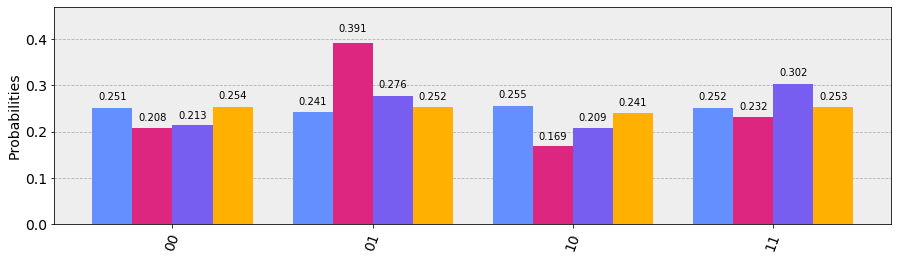

In [61]:
PLOT_HISTOGRAMS( [DADOS_2, DADOS_ibmqx2, DADOS_ibmq_ourense, DADOS_ibmq_16_melbourne] ) 

In [62]:
fig = plot_histogram( [DADOS_3, DADOS_ibmqx2, DADOS_ibmq_ourense, DADOS_ibmq_16_melbourne], bar_labels = False, color= ['blue','red','green','gray'], figsize = (10, 6) );
ax = fig.axes[0]
ax.patch.set_facecolor('white')
ax.patch.set_alpha(0.5)
ax.patch.set_edgecolor('black')
ax.set_ylabel('Probabilidades', fontsize=26)
ax.set_yticklabels([0.0, 0.1, 0.2, 0.3, 0.4], fontsize=20)
ax.set_xticklabels([r'$\left\vert00\right\rangle$', r'$\left\vert01\right\rangle$', r'$\left\vert10\right\rangle$', r'$\left\vert11\right\rangle$' ], fontsize=20)
fig.savefig('Hist_IBMQ_QC_QFT_2qubit3.png')